In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('education_career_success.csv')

In [4]:
df

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S04996,26,Female,2.44,1258,776,2.44,Arts,3,7,3,8,5,5,31500.0,9,5,Mid,7,No
4996,S04997,18,Female,3.94,1032,923,3.73,Law,0,9,3,6,4,5,41800.0,9,2,Entry,4,No
4997,S04998,19,Female,3.45,1299,720,2.52,Law,3,5,5,6,2,2,49500.0,2,5,Mid,6,No
4998,S04999,19,Male,2.70,1038,319,3.94,Law,1,4,5,5,1,5,54700.0,9,4,Entry,6,No


In [5]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'High_School_GPA', 'SAT_Score',
       'University_Ranking', 'University_GPA', 'Field_of_Study',
       'Internships_Completed', 'Projects_Completed', 'Certifications',
       'Soft_Skills_Score', 'Networking_Score', 'Job_Offers',
       'Starting_Salary', 'Career_Satisfaction', 'Years_to_Promotion',
       'Current_Job_Level', 'Work_Life_Balance', 'Entrepreneurship'],
      dtype='object')

In [6]:
df.isna().sum()

Student_ID               0
Age                      0
Gender                   0
High_School_GPA          0
SAT_Score                0
University_Ranking       0
University_GPA           0
Field_of_Study           0
Internships_Completed    0
Projects_Completed       0
Certifications           0
Soft_Skills_Score        0
Networking_Score         0
Job_Offers               0
Starting_Salary          0
Career_Satisfaction      0
Years_to_Promotion       0
Current_Job_Level        0
Work_Life_Balance        0
Entrepreneurship         0
dtype: int64

In [7]:
df.dtypes

Student_ID                object
Age                        int64
Gender                    object
High_School_GPA          float64
SAT_Score                  int64
University_Ranking         int64
University_GPA           float64
Field_of_Study            object
Internships_Completed      int64
Projects_Completed         int64
Certifications             int64
Soft_Skills_Score          int64
Networking_Score           int64
Job_Offers                 int64
Starting_Salary          float64
Career_Satisfaction        int64
Years_to_Promotion         int64
Current_Job_Level         object
Work_Life_Balance          int64
Entrepreneurship          object
dtype: object

## Data Pre-Processing

In [8]:
# non numeric columns
df.select_dtypes(exclude=['number'])

,Student_ID,Gender,Field_of_Study,Current_Job_Level,Entrepreneurship
0,S00001,Male,Arts,Entry,No
1,S00002,Other,Law,Mid,No
2,S00003,Female,Medicine,Entry,No
3,S00004,Male,Computer Science,Mid,No
4,S00005,Male,Engineering,Entry,No
...,...,...,...,...,...
4995,S04996,Female,Arts,Mid,No
4996,S04997,Female,Law,Entry,No
4997,S04998,Female,Law,Mid,No
4998,S04999,Male,Law,Entry,No


In [9]:
df['Entrepreneurship'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
df['Entrepreneurship'] = df['Entrepreneurship'].apply(lambda x: 1 if x=='Yes' else 0)

In [11]:
df['Current_Job_Level'].unique()

array(['Entry', 'Mid', 'Senior', 'Executive'], dtype=object)

In [12]:
def filter_job_level(job):
    if job == 'Entry':
        return 1
    if job == 'Mid':
        return 2
    if job == 'Senior':
        return 3
    if job == 'Executive':
        return 4

In [13]:
df['Filter_Job_Level'] = df['Current_Job_Level'].apply(filter_job_level)

## Exploratory Data Analysis

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'High_School_GPA', 'SAT_Score',
       'University_Ranking', 'University_GPA', 'Field_of_Study',
       'Internships_Completed', 'Projects_Completed', 'Certifications',
       'Soft_Skills_Score', 'Networking_Score', 'Job_Offers',
       'Starting_Salary', 'Career_Satisfaction', 'Years_to_Promotion',
       'Current_Job_Level', 'Work_Life_Balance', 'Entrepreneurship',
       'Filter_Job_Level'],
      dtype='object')

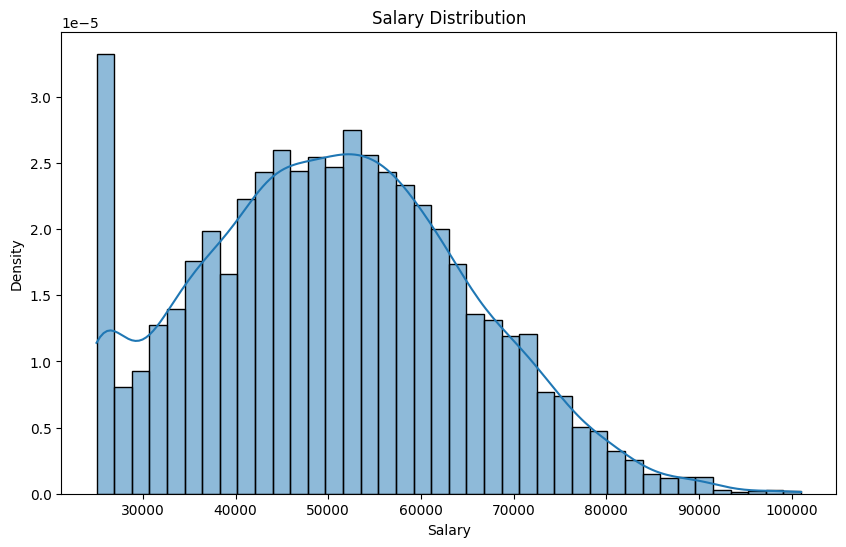

In [16]:
# PDf of Starting Salary
plt.figure(figsize = (10, 6))

sns.histplot(df['Starting_Salary'], bins = 40, kde = True, stat = 'density')

plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('Salary Distribution')

plt.show()

In [17]:
df.groupby('Gender')[['High_School_GPA','University_GPA']].mean()

,High_School_GPA,University_GPA
Gender,,
Female,2.998191,3.027332
Male,3.000443,3.008405
Other,2.937760,3.079427


In [18]:
df['Field_of_Study'].unique()

array(['Arts', 'Law', 'Medicine', 'Computer Science', 'Engineering',
       'Business', 'Mathematics'], dtype=object)

In [19]:
df.select_dtypes(exclude=['number'])

,Student_ID,Gender,Field_of_Study,Current_Job_Level
0,S00001,Male,Arts,Entry
1,S00002,Other,Law,Mid
2,S00003,Female,Medicine,Entry
3,S00004,Male,Computer Science,Mid
4,S00005,Male,Engineering,Entry
...,...,...,...,...
4995,S04996,Female,Arts,Mid
4996,S04997,Female,Law,Entry
4997,S04998,Female,Law,Mid
4998,S04999,Male,Law,Entry


In [20]:
df.dtypes

Student_ID                object
Age                        int64
Gender                    object
High_School_GPA          float64
SAT_Score                  int64
University_Ranking         int64
University_GPA           float64
Field_of_Study            object
Internships_Completed      int64
Projects_Completed         int64
Certifications             int64
Soft_Skills_Score          int64
Networking_Score           int64
Job_Offers                 int64
Starting_Salary          float64
Career_Satisfaction        int64
Years_to_Promotion         int64
Current_Job_Level         object
Work_Life_Balance          int64
Entrepreneurship           int64
Filter_Job_Level           int64
dtype: object

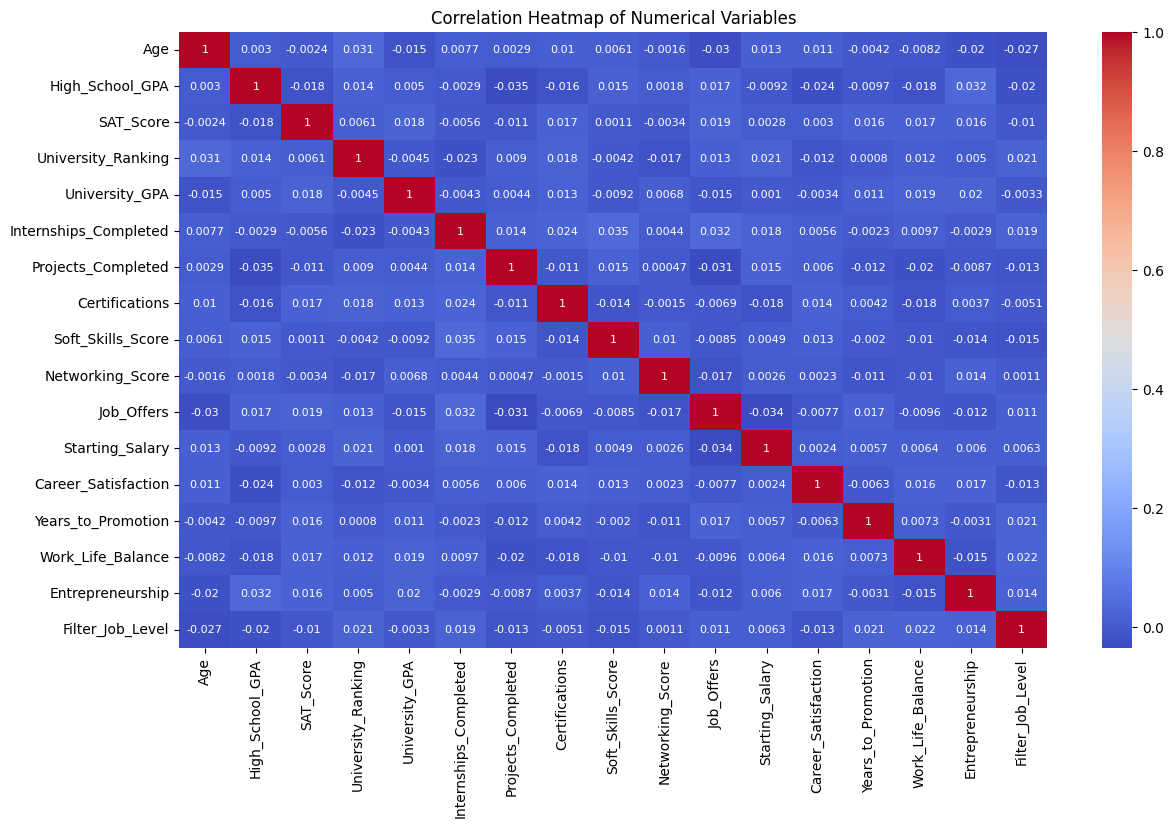

In [21]:
numerical= df.select_dtypes(exclude = ['object'])
correlation_matrix = numerical.corr()

plt.figure(figsize = (14, 8))
sns.heatmap(correlation_matrix, annot= True, cmap = 'coolwarm', annot_kws={'size': 8})
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

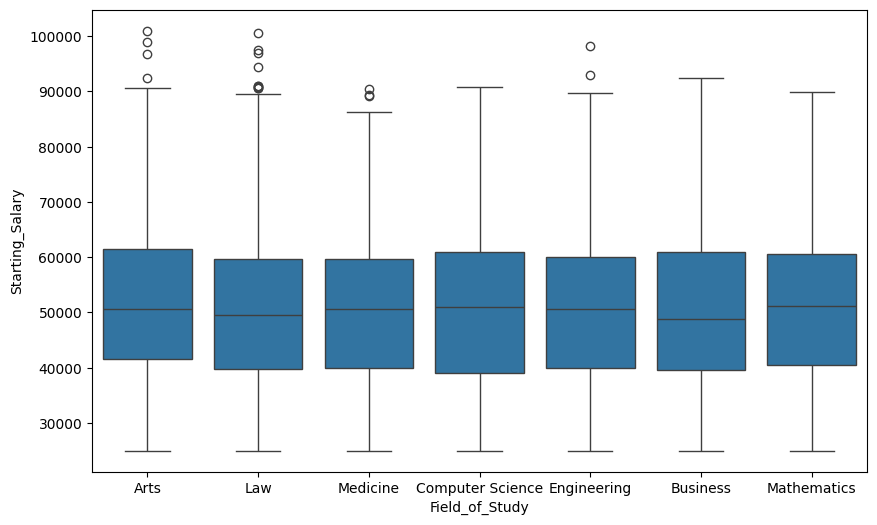

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = df, x = 'Field_of_Study', y = 'Starting_Salary')
plt.show()


In [23]:
df.describe()

,Age,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Work_Life_Balance,Entrepreneurship,Filter_Job_Level
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,23.442200,2.996978,1253.832000,504.335600,3.020028,1.982200,4.562800,2.512200,5.546000,5.538000,2.488800,50563.540000,5.578000,3.015800,5.482400,0.201600,1.750600
std,3.473712,0.575673,203.228954,291.060011,0.576047,1.408219,2.872927,1.703183,2.851159,2.850084,1.711859,14494.958207,2.871997,1.417446,2.883427,0.401235,0.873471
min,18.000000,2.000000,900.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25000.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,20.000000,2.500000,1076.000000,256.000000,2.520000,1.000000,2.000000,1.000000,3.000000,3.000000,1.000000,40200.000000,3.000000,2.000000,3.000000,0.000000,1.000000
50%,23.000000,2.990000,1257.000000,501.500000,3.030000,2.000000,5.000000,3.000000,6.000000,6.000000,2.000000,50300.000000,6.000000,3.000000,6.000000,0.000000,2.000000
75%,26.000000,3.500000,1432.000000,759.000000,3.510000,3.000000,7.000000,4.000000,8.000000,8.000000,4.000000,60500.000000,8.000000,4.000000,8.000000,0.000000,2.000000
max,29.000000,4.000000,1600.000000,1000.000000,4.000000,4.000000,9.000000,5.000000,10.000000,10.000000,5.000000,101000.000000,10.000000,5.000000,10.000000,1.000000,4.000000


## Analysis

In [24]:
import statsmodels.formula.api as smf

In [25]:
df.dtypes

Student_ID                object
Age                        int64
Gender                    object
High_School_GPA          float64
SAT_Score                  int64
University_Ranking         int64
University_GPA           float64
Field_of_Study            object
Internships_Completed      int64
Projects_Completed         int64
Certifications             int64
Soft_Skills_Score          int64
Networking_Score           int64
Job_Offers                 int64
Starting_Salary          float64
Career_Satisfaction        int64
Years_to_Promotion         int64
Current_Job_Level         object
Work_Life_Balance          int64
Entrepreneurship           int64
Filter_Job_Level           int64
dtype: object

In [26]:
df['Field_of_Study'] =  df['Field_of_Study'].astype('category')
df['Student_ID'] =  df['Student_ID'].astype('category')
df['Gender'] =  df['Gender'].astype('category')

In [27]:
model = "Starting_Salary ~ " + " + ".join(df.columns.drop(["Starting_Salary", "Student_ID", "Current_Job_Level"]))

full_model = smf.ols(model, data = df).fit()

print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Starting_Salary   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8341
Date:                Sun, 09 Mar 2025   Prob (F-statistic):              0.695
Time:                        22:27:07   Log-Likelihood:                -54992.
No. Observations:                5000   AIC:                         1.100e+05
Df Residuals:                    4975   BIC:                         1.102e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
exog = full_model.model.exog
names = full_model.params.index
for i in range(1, exog.shape[1]):
    print(f'VIF: {names[i]}: {variance_inflation_factor(exog, i): .3f}')

VIF: Gender[T.Male]:  1.043
VIF: Gender[T.Other]:  1.045
VIF: Field_of_Study[T.Business]:  1.684
VIF: Field_of_Study[T.Computer Science]:  1.646
VIF: Field_of_Study[T.Engineering]:  1.670
VIF: Field_of_Study[T.Law]:  1.687
VIF: Field_of_Study[T.Mathematics]:  1.701
VIF: Field_of_Study[T.Medicine]:  1.659
VIF: Age:  1.006
VIF: High_School_GPA:  1.007
VIF: SAT_Score:  1.004
VIF: University_Ranking:  1.004
VIF: University_GPA:  1.005
VIF: Internships_Completed:  1.005
VIF: Projects_Completed:  1.005
VIF: Certifications:  1.004
VIF: Soft_Skills_Score:  1.003
VIF: Networking_Score:  1.003
VIF: Job_Offers:  1.006
VIF: Career_Satisfaction:  1.004
VIF: Years_to_Promotion:  1.003
VIF: Work_Life_Balance:  1.005
VIF: Entrepreneurship:  1.006
VIF: Filter_Job_Level:  1.005


In [30]:
model_reduced = "Starting_Salary ~ Gender + Field_of_Study + University_Ranking + Job_Offers + Certifications + Work_Life_Balance + (Field_of_Study * University_Ranking)"
reduced_model = smf.ols(model_reduced, data=df).fit()

print(reduced_model.summary())


                            OLS Regression Results                            
Dep. Variable:        Starting_Salary   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.084
Date:                Sun, 09 Mar 2025   Prob (F-statistic):              0.361
Time:                        22:27:07   Log-Likelihood:                -54992.
No. Observations:                5000   AIC:                         1.100e+05
Df Residuals:                    4981   BIC:                         1.101e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [33]:
df['Job_Offers']

0       5
1       4
2       0
3       1
4       4
       ..
4995    5
4996    5
4997    2
4998    5
4999    2
Name: Job_Offers, Length: 5000, dtype: int64

In [32]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'High_School_GPA', 'SAT_Score',
       'University_Ranking', 'University_GPA', 'Field_of_Study',
       'Internships_Completed', 'Projects_Completed', 'Certifications',
       'Soft_Skills_Score', 'Networking_Score', 'Job_Offers',
       'Starting_Salary', 'Career_Satisfaction', 'Years_to_Promotion',
       'Current_Job_Level', 'Work_Life_Balance', 'Entrepreneurship',
       'Filter_Job_Level'],
      dtype='object')